#FFT_Noise_and_Targets

---
Aim:
- To understand how Additive White Gaussian Noise (AWGN) affects radar signals,
- how to control noise using SNR (Signal-to-Noise Ratio),
- how noise appears in the frequency domain (FFT magnitude plot).
In radar, we never receive a perfectly clean echo. The receiver always adds random noise, from electronics, the environment, or even space.
   
**Equations:**
    
**Signal + Noise**

$$
r(t)=s(t)+n(t)
$$

n(t) = random noise

**Signal-to-Noise Ratio:**


$$
\text{SNR}_{\text{dB}} = 10 \, \log_{10}\!\left( \frac{P_s}{P_n} \right)
$$

---

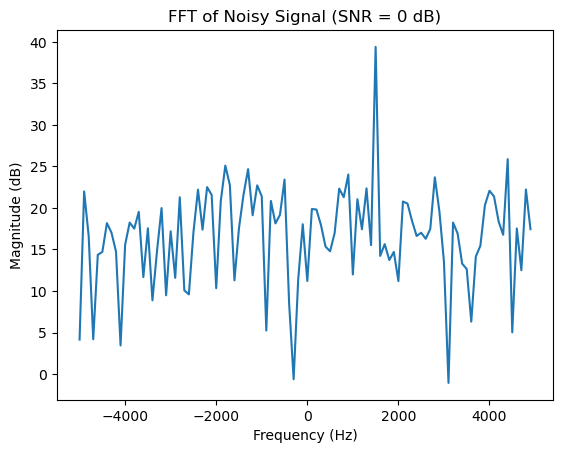

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function: Add complex AWGN
def add_awgn(signal, snr_db, rng=None):
    rng = np.random.default_rng(rng)
    Ps = np.mean(np.abs(signal)**2)      # signal power
    snr_lin = 10**(snr_db/10)            # convert dB to linear
    Pn = Ps / snr_lin                    # noise power
    n = (rng.normal(scale=np.sqrt(Pn/2), size=signal.shape)
         + 1j*rng.normal(scale=np.sqrt(Pn/2), size=signal.shape))  #Generate Complex Gaussian Noise
    return signal + n  # Add Noise to Signal

# Parameters
fs = 10000.0
T = 0.01
f0 = 1500.0
phi = np.deg2rad(20)
t = np.arange(0, T, 1/fs)
x = np.exp(1j*(2*np.pi*f0*t + phi))

# Add noise with 0 dB SNR
y = add_awgn(x, snr_db=0, rng=42)  # 0 dB means signal and noise have equal power

# FFT
N = len(y)
freq = np.fft.fftfreq(N, d=1/fs)  #FFT turns the noisy signal from time to frequency.
Y = np.fft.fft(y)

# Plot
plt.figure()
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(20*np.log10(np.abs(Y))))  #It take the magnitude and convert it to dB to better see differences in strength.
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('FFT of Noisy Signal (SNR = 0 dB)')
plt.show()
